# Exploratory Data Analysis
---------

## Importing Libraries:

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import re

%matplotlib inline

-------
## Importing the SEC filings for Apple, Inc.

In [53]:
! ls data

apple_sec.csv   clean_apple.csv


In [54]:
df = pd.read_csv('data/apple_sec.csv')
df.head()

,date,document_type,description,file_number
0,1994-01-26,424B5,Prospectus [Rule 424(b)(5)]Acc-no: 0000891618-...,033-6231094502696
1,1994-01-26,10-Q,Quarterly report [Sections 13 or 15(d)]Acc-no:...,000-1003094502732
2,1994-02-10,SC 13G/A,[Amend] Statement of acquisition of beneficial...,005-3363294505635
3,1994-02-17,SC 13G/A,[Amend] Statement of acquisition of beneficial...,005-3363294510471
4,1994-02-18,SC 13G,Statement of acquisition of beneficial ownersh...,005-3363200000000


In [55]:
df.description.head()

0    Prospectus [Rule 424(b)(5)]Acc-no: 0000891618-...
1    Quarterly report [Sections 13 or 15(d)]Acc-no:...
2    [Amend] Statement of acquisition of beneficial...
3    [Amend] Statement of acquisition of beneficial...
4    Statement of acquisition of beneficial ownersh...
Name: description, dtype: object

In [56]:
sum(df.description.str.contains('Rule 424'))

48

## Inspecting the Data:

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 4 columns):
date             585 non-null object
document_type    585 non-null object
description      585 non-null object
file_number      533 non-null object
dtypes: object(4)
memory usage: 18.4+ KB


In [58]:
df.describe()

,date,document_type,description,file_number
count,585,585,585,533
unique,509,37,585,533
top,2005-02-14,8-K,"Current report, items 2.02 and 9.01\nAcc-no: 0...",001-3674317664239
freq,4,164,1,1


-------

## Converting the Date Type into Date Time:

In [59]:
df['date'] = pd.to_datetime(df.date, dayfirst=True)
# df.set_index('Date', inplace=True)
# df.sort_index(inplace=True, ascending=True)
df.head(2)

,date,document_type,description,file_number
0,1994-01-26,424B5,Prospectus [Rule 424(b)(5)]Acc-no: 0000891618-...,033-6231094502696
1,1994-01-26,10-Q,Quarterly report [Sections 13 or 15(d)]Acc-no:...,000-1003094502732


-------

## Inspecting Missing Values:

- File Serial-Number Missing: 52

In [60]:
df.isnull().sum()

date              0
document_type     0
description       0
file_number      52
dtype: int64

## Displaying the Missing Values:

In [61]:
df[df['file_number'].isnull().sort_values(ascending=False)]

/Users/adamdelreal/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,date,document_type,description,file_number
11,1995-01-10,SC 13D/A,[Amend] General statement of acquisition of be...,NaN
13,1995-02-07,SC 13D/A,[Amend] General statement of acquisition of be...,NaN
23,1995-11-13,SC 13D/A,[Amend] General statement of acquisition of be...,NaN
24,1995-12-14,SC 13D/A,[Amend] General statement of acquisition of be...,NaN
25,1995-12-14,SC 13D/A,[Amend] General statement of acquisition of be...,NaN
29,1996-02-13,SC 13G,Statement of acquisition of beneficial ownersh...,NaN
31,1996-04-17,SC 13D/A,[Amend] General statement of acquisition of be...,NaN
203,2006-08-17,CORRESP,[Cover]CorrespondenceAcc-no: 0001104659-06-055...,NaN
204,2006-08-28,UPLOAD,[Cover]SEC-generated letterAcc-no: 0000000000-...,NaN
207,2006-10-06,UPLOAD,[Cover]SEC-generated letterAcc-no: 0000000000-...,NaN


## Dropping File Number:

In [62]:
df.drop('file_number', axis=1, inplace=True)

In [63]:
df.head(2)

,date,document_type,description
0,1994-01-26,424B5,Prospectus [Rule 424(b)(5)]Acc-no: 0000891618-...
1,1994-01-26,10-Q,Quarterly report [Sections 13 or 15(d)]Acc-no:...


-----

## Converting All Descriptions into Lower Case:

In [64]:
df['description'] = df['description'].apply(lambda x: x.lower())
df.head()

,date,document_type,description
0,1994-01-26,424B5,prospectus [rule 424(b)(5)]acc-no: 0000891618-...
1,1994-01-26,10-Q,quarterly report [sections 13 or 15(d)]acc-no:...
2,1994-02-10,SC 13G/A,[amend] statement of acquisition of beneficial...
3,1994-02-17,SC 13G/A,[amend] statement of acquisition of beneficial...
4,1994-02-18,SC 13G,statement of acquisition of beneficial ownersh...


--- 

## Cleaning the Descriptions:

In [65]:
df['description'] = df.description.str.replace('[^a-z]', ' ')
df[['description']].head()

,description
0,prospectus rule b acc no ...
1,quarterly report sections or d acc no ...
2,amend statement of acquisition of beneficial...
3,amend statement of acquisition of beneficial...
4,statement of acquisition of beneficial ownersh...


------

## Taking a Look at the Amount of Words per Description:

In [66]:
description_len = [len(x.split()) for x in df.description]

In [67]:
description_len_df = pd.DataFrame(description_len)

In [68]:
description_len_df.rename(columns={0: 'words_in_description'}, inplace=True)

In [69]:
print('Total Number of Words:', description_len_df.sum())

Total Number of Words: words_in_description    5604
dtype: int64


In [70]:
description_len_df.head(10)

,words_in_description
0,7
1,9
2,12
3,12
4,11
5,12
6,13
7,13
8,9
9,7


-------
# Visualization:

## Plotting the Number of Words per Description:

In [17]:
def dist_plot(column):
    plt.figure(figsize=(14,7))
    sns.distplot(column, bins = 14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xlabel('Number of Words', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.title('SEC Document Descriptions', fontsize=18)

/Users/adamdelreal/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


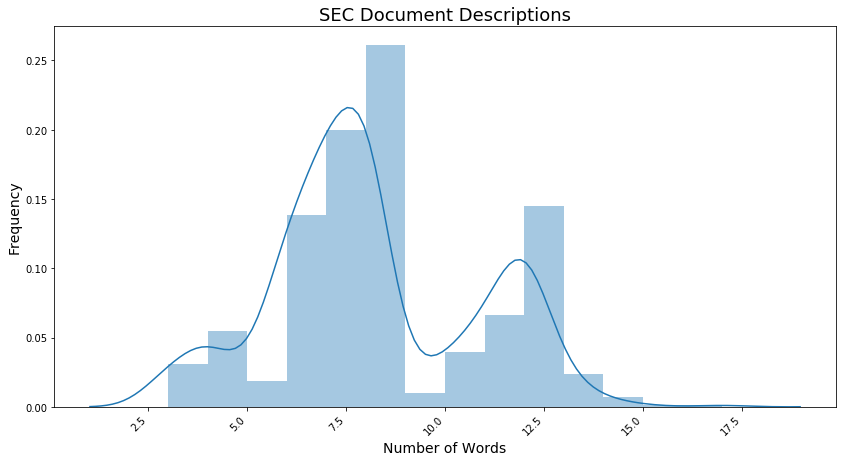

In [18]:
dist_plot(description_len_df);

------
# Visualization:

## Plotting Document Types:

In [19]:
def count_plot(column):
    plt.figure(figsize=(14,7))
    sns.countplot(x=column, data=df)
    plt.ylabel('Frequency', fontsize=14)
    plt.xlabel('Document Type', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.title('SEC Document Filings', fontsize=18)

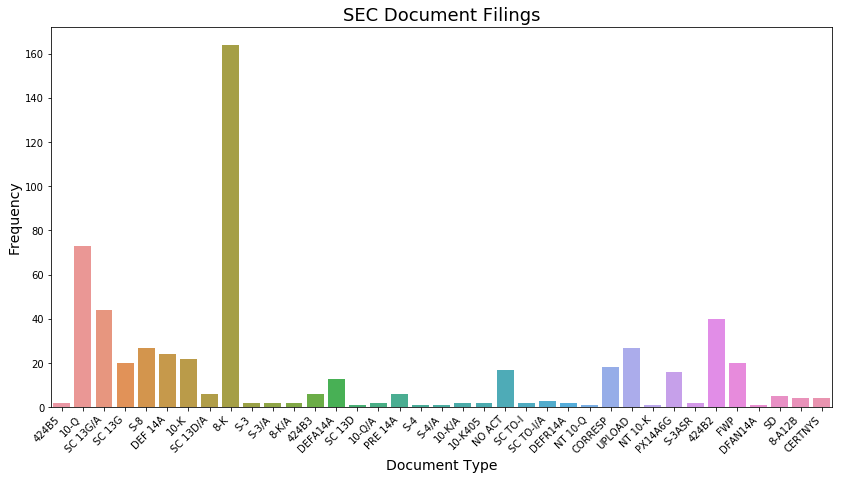

In [20]:
count_plot('document_type')

-------
# Feature Engineering:

## Creating Dummy Variables from the Document Types:

In [21]:
dummy = pd.get_dummies(df.document_type)
df = pd.concat([df, dummy], axis=1)

df.head()

,date,document_type,description,10-K,10-K/A,10-K405,10-Q,10-Q/A,424B2,424B3,...,S-4/A,S-8,SC 13D,SC 13D/A,SC 13G,SC 13G/A,SC TO-I,SC TO-I/A,SD,UPLOAD
0,1994-01-26,424B5,prospectus rule baccno size kb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994-01-26,10-Q,quarterly report sections or daccno size kb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1994-02-10,SC 13G/A,amend statement of acquisition of beneficial o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1994-02-17,SC 13G/A,amend statement of acquisition of beneficial o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1994-02-18,SC 13G,statement of acquisition of beneficial ownersh...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


-------



---------

## Saving onto a CSV:

In [22]:
# df.to_csv('data/clean_apple.csv', index=False)